In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
bse = pd.read_csv('BSEp.csv')
bse.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,ADANIPORTS,2008-05-06,150.000000,153.570007,147.820007,151.149994,134.313477,1782030.0
1,ADANIPORTS,2008-05-07,152.000000,154.460007,150.240005,153.309998,136.232864,1180015.0
2,ADANIPORTS,2008-05-08,152.199997,156.759995,150.199997,155.889999,138.525497,1856245.0
3,ADANIPORTS,2008-05-09,155.000000,160.600006,154.210007,156.520004,139.085312,3251375.0
4,ADANIPORTS,2008-05-12,156.000000,163.479996,151.000000,162.500000,144.399170,5031635.0


In [3]:
bse[['Open','High','Low','Close','Adj Close']] = bse[['Open','High','Low','Close','Adj Close']].replace('null', np.NaN)

In [4]:
bse['Open']=bse['Open'].fillna(method='pad')

In [5]:
bse['High']=bse['High'].fillna(method='pad')

In [6]:
bse['Low']=bse['Low'].fillna(method='pad')

In [7]:
bse['Close']=bse['Close'].fillna(method='pad')

In [8]:
bse['Adj Close']=bse['Adj Close'].fillna(method='pad')

In [9]:
bse['Volume']=bse['Volume'].fillna(method='pad')

In [10]:
bse1= pd.DataFrame(bse, columns=['Date','Close'])
bse1.head()

,Date,Close
0,2008-05-06,151.149994
1,2008-05-07,153.309998
2,2008-05-08,155.889999
3,2008-05-09,156.520004
4,2008-05-12,162.500000


In [11]:
bse1=bse1.rename(columns={'Date':'ds', 'Close':'y'})
bse1.tail()

,ds,y
2464,2018-04-27,401.450012
2465,2018-04-30,406.450012
2466,2018-05-02,399.899994
2467,2018-05-03,396.799988
2468,2018-05-04,408.200012


In [12]:
model = Prophet(daily_seasonality=True)
model.fit(bse1)

In [13]:
future = model.make_future_dataframe(periods=365)

In [14]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-05-06,146.488120,110.055434,150.295368,146.488120,146.488120,-16.040665,-16.040665,-16.040665,-13.844194,...,0.249916,0.249916,0.249916,-2.446387,-2.446387,-2.446387,0.0,0.0,0.0,130.447455
1,2008-05-07,146.201280,110.056329,151.280511,146.201280,146.201280,-15.719954,-15.719954,-15.719954,-13.844194,...,0.018742,0.018742,0.018742,-1.894503,-1.894503,-1.894503,0.0,0.0,0.0,130.481326
2,2008-05-08,145.914440,110.208814,151.283625,145.914440,145.914440,-15.066663,-15.066663,-15.066663,-13.844194,...,0.093984,0.093984,0.093984,-1.316454,-1.316454,-1.316454,0.0,0.0,0.0,130.847777
3,2008-05-09,145.627600,110.843593,151.714328,145.627600,145.627600,-14.584683,-14.584683,-14.584683,-13.844194,...,-0.022030,-0.022030,-0.022030,-0.718459,-0.718459,-0.718459,0.0,0.0,0.0,131.042917
4,2008-05-12,144.767079,112.448837,151.567434,144.767079,144.767079,-12.667073,-12.667073,-12.667073,-13.844194,...,0.048976,0.048976,0.048976,1.128145,1.128145,1.128145,0.0,0.0,0.0,132.100006
5,2008-05-13,144.480239,112.107040,153.452220,144.480239,144.480239,-11.856154,-11.856154,-11.856154,-13.844194,...,0.249916,0.249916,0.249916,1.738123,1.738123,1.738123,0.0,0.0,0.0,132.624084
6,2008-05-14,144.193399,113.336830,153.415888,144.193399,144.193399,-11.491611,-11.491611,-11.491611,-13.844194,...,0.018742,0.018742,0.018742,2.333840,2.333840,2.333840,0.0,0.0,0.0,132.701787
7,2008-05-15,143.906558,113.138060,151.974019,143.906558,143.906558,-10.841514,-10.841514,-10.841514,-13.844194,...,0.093984,0.093984,0.093984,2.908696,2.908696,2.908696,0.0,0.0,0.0,133.065044
8,2008-05-16,143.619718,111.836726,153.856057,143.619718,143.619718,-10.409778,-10.409778,-10.409778,-13.844194,...,-0.022030,-0.022030,-0.022030,3.456446,3.456446,3.456446,0.0,0.0,0.0,133.209940
9,2008-05-20,142.472357,115.085769,155.788083,142.472357,142.472357,-8.325003,-8.325003,-8.325003,-13.844194,...,0.249916,0.249916,0.249916,5.269275,5.269275,5.269275,0.0,0.0,0.0,134.147355


In [15]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2008-05-06,130.447455,110.055434,150.295368
1,2008-05-07,130.481326,110.056329,151.280511
2,2008-05-08,130.847777,110.208814,151.283625
3,2008-05-09,131.042917,110.843593,151.714328
4,2008-05-12,132.100006,112.448837,151.567434


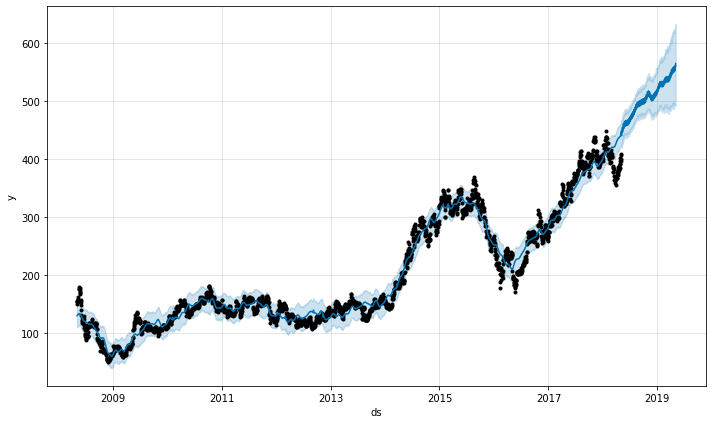

In [16]:
plot1 = model.plot(forecast)

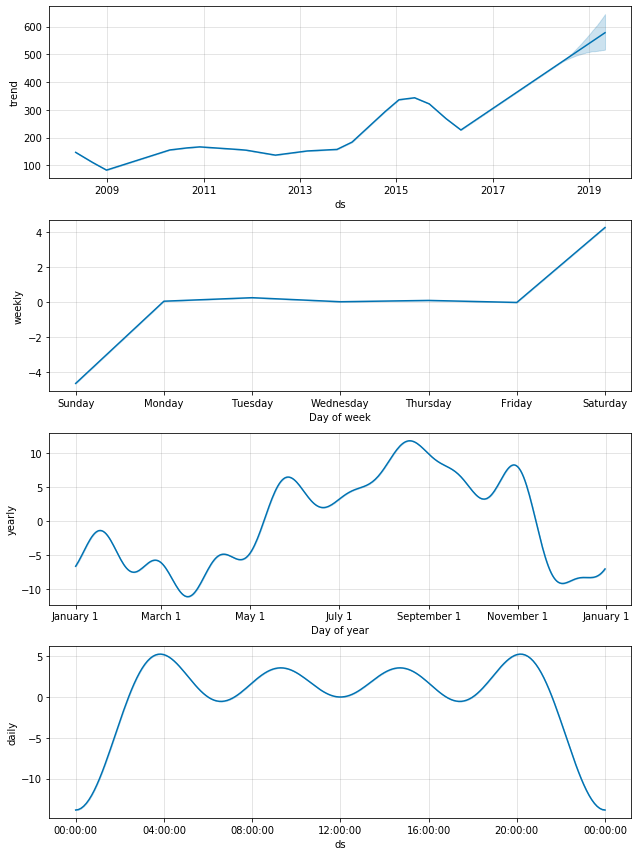

In [17]:
plot2 = model.plot_components(forecast)

# Model evaluation

In [18]:
metrics=forecast.set_index('ds')[['yhat']].join(bse1.set_index('ds').y).reset_index()

In [19]:
metrics.tail()

,ds,yhat,y
2829,2019-04-30,557.743010,NaN
2830,2019-05-01,558.093693,NaN
2831,2019-05-02,558.801212,NaN
2832,2019-05-03,559.366780,NaN
2833,2019-05-04,564.394397,NaN


In [20]:
metrics.dropna(inplace=True)
metrics.tail()

,ds,yhat,y
2464,2018-04-27,438.957191,401.450012
2465,2018-04-30,440.511478,406.450012
2466,2018-05-02,441.720502,399.899994
2467,2018-05-03,442.489365,396.799988
2468,2018-05-04,443.113541,408.200012


In [21]:
m1=r2_score(metrics.y, metrics.yhat)
print("R^2 value:{}".format(m1) )

R^2 value:0.973216717783955


In [22]:
m2=mean_squared_error(metrics.y, metrics.yhat)
print("Mean squared error:{}".format(m2) )

Mean squared error:253.0867018329723


In [23]:
m3=mean_absolute_error(metrics.y, metrics.yhat)
print("Mean absolute error:{}".format(m3) )

Mean absolute error:12.098020344718345
